# Import lib

In [1]:
import numpy as np 
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Check FIle Directory

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heartbeat/mitbih_train.csv
/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv


# Loading Dataset

In [3]:
train_df = pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv", header=None)
test_df = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)

print(train_df.shape)
print(test_df.shape)

(87554, 188)
(21892, 188)


In [4]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(train_df[train_df.columns[-1]].unique())
print(train_df[test_df.columns[-1]].unique())

[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]


# Split data set

In our dataset, last column has target index ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [7]:
train_x = np.array(train_df[train_df.columns[0:-1]], dtype=np.float32)
train_y = np.array(train_df[train_df.columns[-1:]], dtype=np.float32)

test_x = np.array(train_df[test_df.columns[0:-1]], dtype=np.float32)
test_y = np.array(train_df[test_df.columns[-1:]], dtype=np.float32)

print("print train set is : x = {} y = {}".format(train_x.shape, train_y.shape))
print("print test set is : x = {} y = {}".format(test_x.shape, test_y.shape))

print train set is : x = (87554, 187) y = (87554, 1)
print test set is : x = (87554, 187) y = (87554, 1)


# Feature engineering?

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

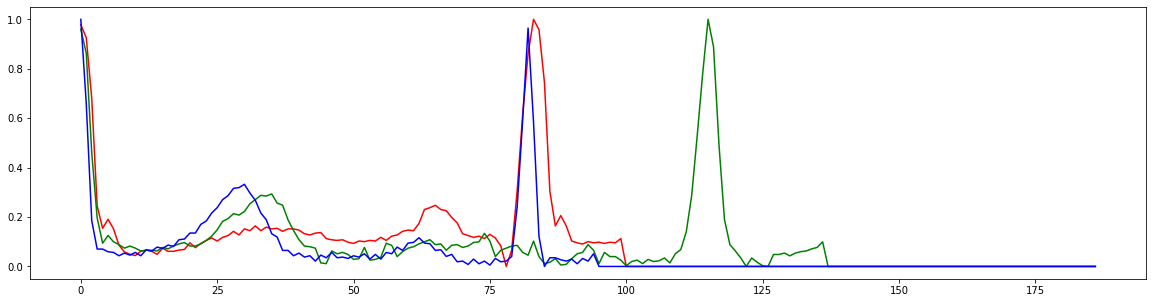

In [9]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(train_x[0], color="r")
ax.plot(train_x[1], color="g")
ax.plot(train_x[2], color="b")
plt.show()

Our data set looks like signal data(time series)

### Calculate difference between t(unit time) with t+1

We usually analyze signal data using data's amplitude, frequency and shape of signal.

Now, Let's use shape of graph as feature. So I assumed that difference between time interval(t and t+1 (t is unit time)) can be used.

(x(t+1) - x(t)) / unit time -> means  gradient of graph.

How about we use this with value of specific time point?

Because graph can be drawed with value and gradient, we can assume that will be fitted to use.

In [10]:
# Return difference array
def return_diff_array_table(array, dur):
  for idx in range(array.shape[1]-dur):
    before_col = array[:,idx]
    after_col = array[:,idx+dur]
    new_col = ((after_col - before_col)+1)/2
    new_col = new_col.reshape(-1,1)
    if idx == 0:
      new_table = new_col
    else :
      new_table = np.concatenate((new_table, new_col), axis=1)
#For concat add zero padding
  padding_array = np.zeros(shape=(array.shape[0],dur))
  new_table = np.concatenate((padding_array, new_table), axis=1)
  return new_table
#Concat
def return_merge_diff_table(df, diff_dur):
  fin_table = df.reshape(-1,187,1,1)
  for dur in diff_dur:
    temp_table = return_diff_array_table(df, dur)
    fin_table = np.concatenate((fin_table, temp_table.reshape(-1,187,1,1)), axis=2)
  return fin_table

#Use "stratify" option
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, stratify=train_y)

#Add Data
x_train = return_merge_diff_table(df=x_train, diff_dur=[1])
x_val = return_merge_diff_table(df=x_val, diff_dur=[1])

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(70043, 187, 2, 1) (70043, 1) (17511, 187, 2, 1) (17511, 1)


# Make Model 1

In [11]:
#For see a model's result
def return_result(model, x_train, x_test, y_train, y_test):
    y_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    pred_list=[]
    for x in y_pred:
        pred_list.append(np.argmax(x))
    train_pred_list=[]
    for x in train_pred:
        train_pred_list.append(np.argmax(x))
    test_mat = confusion_matrix(y_test, pred_list)
    train_mat = confusion_matrix(y_train, train_pred_list)
    print("In train")
    print(accuracy_score(y_train, train_pred_list))
    print(train_mat)
    print("In test")
    print(accuracy_score(y_test, pred_list))
    print(test_mat)

In [12]:
def return_model1():
    input_tens = tf.keras.Input(shape=(187,2,1))
    x = tf.keras.layers.Conv2D(256, kernel_size=(10,2), strides=(5,1),padding='valid')(input_tens)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(128, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(5, activation="softmax")(x)
    model = tf.keras.Model(inputs=input_tens, outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
    print(model.summary())
    return model

In [13]:
model1 = return_model1()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 187, 2, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 36, 1, 256)        5376      
_________________________________________________________________
batch_normalization (BatchNo (None, 36, 1, 256)        1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 36, 1, 256)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 1, 256)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 1, 512)        655872    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 1, 512)        2048  

In [14]:
#For saving best model
checkpoint_path_best = "./best_acc_v01.ckpt"
cp_callback_best = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_best,monitor="val_accuracy",save_weights_only=True,verbose=1,save_best_only=True)

model1.fit(x_train,y_train, epochs=200, batch_size=128, validation_data=(x_val,y_val),callbacks=[cp_callback_best])

Train on 70043 samples, validate on 17511 samples
Epoch 1/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.3431 - accuracy: 0.9027
Epoch 00001: val_accuracy improved from -inf to 0.88419, saving model to ./best_acc_v01.ckpt
70043/70043 [==============================] - 15s 216us/sample - loss: 0.3428 - accuracy: 0.9028 - val_loss: 0.3656 - val_accuracy: 0.8842
Epoch 2/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.1873 - accuracy: 0.9476
Epoch 00002: val_accuracy improved from 0.88419 to 0.93958, saving model to ./best_acc_v01.ckpt
70043/70043 [==============================] - 10s 140us/sample - loss: 0.1873 - accuracy: 0.9476 - val_loss: 0.1915 - val_accuracy: 0.9396
Epoch 3/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.1457 - accuracy: 0.9608
Epoch 00003: val_accuracy improved from 0.93958 to 0.96425, saving model to ./best_acc_v01.ckpt
70043/70043 [==============================] - 10s 138us/sample - loss: 0.1457 - a

70016/70043 [============================>.] - ETA: 0s - loss: 0.0518 - accuracy: 0.9843
Epoch 00026: val_accuracy did not improve from 0.98624
70043/70043 [==============================] - 10s 137us/sample - loss: 0.0518 - accuracy: 0.9843 - val_loss: 0.0464 - val_accuracy: 0.9862
Epoch 27/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0487 - accuracy: 0.9852
Epoch 00027: val_accuracy did not improve from 0.98624
70043/70043 [==============================] - 9s 136us/sample - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0563 - val_accuracy: 0.9844
Epoch 28/200
69760/70043 [============================>.] - ETA: 0s - loss: 0.0492 - accuracy: 0.9848
Epoch 00028: val_accuracy did not improve from 0.98624
70043/70043 [==============================] - 9s 135us/sample - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0570 - val_accuracy: 0.9830
Epoch 29/200
69760/70043 [============================>.] - ETA: 0s - loss: 0.0472 - accuracy: 0.9851
Epoch 00029: val_accur

69632/70043 [============================>.] - ETA: 0s - loss: 0.0337 - accuracy: 0.9894
Epoch 00053: val_accuracy did not improve from 0.98921
70043/70043 [==============================] - 10s 137us/sample - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0494 - val_accuracy: 0.9860
Epoch 54/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0321 - accuracy: 0.9900
Epoch 00054: val_accuracy did not improve from 0.98921
70043/70043 [==============================] - 10s 139us/sample - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0471 - val_accuracy: 0.9869
Epoch 55/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0330 - accuracy: 0.9894
Epoch 00055: val_accuracy improved from 0.98921 to 0.98949, saving model to ./best_acc_v01.ckpt
70043/70043 [==============================] - 10s 138us/sample - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0414 - val_accuracy: 0.9895
Epoch 56/200
69632/70043 [============================>.] - ETA: 0s - loss: 0.031

69760/70043 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9912
Epoch 00080: val_accuracy did not improve from 0.99052
70043/70043 [==============================] - 10s 137us/sample - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.0378 - val_accuracy: 0.9899
Epoch 81/200
69760/70043 [============================>.] - ETA: 0s - loss: 0.0268 - accuracy: 0.9909
Epoch 00081: val_accuracy did not improve from 0.99052
70043/70043 [==============================] - 9s 136us/sample - loss: 0.0268 - accuracy: 0.9909 - val_loss: 0.0403 - val_accuracy: 0.9897
Epoch 82/200
69760/70043 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9919
Epoch 00082: val_accuracy did not improve from 0.99052
70043/70043 [==============================] - 9s 134us/sample - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0390 - val_accuracy: 0.9900
Epoch 83/200
69632/70043 [============================>.] - ETA: 0s - loss: 0.0256 - accuracy: 0.9912
Epoch 00083: val_accur

Epoch 108/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.0206 - accuracy: 0.9928
Epoch 00108: val_accuracy did not improve from 0.99052
70043/70043 [==============================] - 9s 134us/sample - loss: 0.0206 - accuracy: 0.9928 - val_loss: 0.0401 - val_accuracy: 0.9902
Epoch 109/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0211 - accuracy: 0.9932
Epoch 00109: val_accuracy did not improve from 0.99052
70043/70043 [==============================] - 10s 136us/sample - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0389 - val_accuracy: 0.9900
Epoch 110/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9933
Epoch 00110: val_accuracy did not improve from 0.99052
70043/70043 [==============================] - 9s 134us/sample - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0441 - val_accuracy: 0.9894
Epoch 111/200
69632/70043 [============================>.] - ETA: 0s - loss: 0.0214 - accuracy: 0.9928
Epoch

70016/70043 [============================>.] - ETA: 0s - loss: 0.0183 - accuracy: 0.9935
Epoch 00135: val_accuracy did not improve from 0.99092
70043/70043 [==============================] - 9s 135us/sample - loss: 0.0183 - accuracy: 0.9935 - val_loss: 0.0409 - val_accuracy: 0.9903
Epoch 136/200
69632/70043 [============================>.] - ETA: 0s - loss: 0.0183 - accuracy: 0.9936
Epoch 00136: val_accuracy did not improve from 0.99092
70043/70043 [==============================] - 10s 141us/sample - loss: 0.0184 - accuracy: 0.9936 - val_loss: 0.0436 - val_accuracy: 0.9902
Epoch 137/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9935
Epoch 00137: val_accuracy did not improve from 0.99092
70043/70043 [==============================] - 10s 136us/sample - loss: 0.0184 - accuracy: 0.9935 - val_loss: 0.0395 - val_accuracy: 0.9908
Epoch 138/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.0176 - accuracy: 0.9938
Epoch 00138: val_a

Epoch 163/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9948
Epoch 00163: val_accuracy did not improve from 0.99115
70043/70043 [==============================] - 9s 135us/sample - loss: 0.0152 - accuracy: 0.9948 - val_loss: 0.0408 - val_accuracy: 0.9906
Epoch 164/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9944
Epoch 00164: val_accuracy did not improve from 0.99115
70043/70043 [==============================] - 9s 135us/sample - loss: 0.0166 - accuracy: 0.9944 - val_loss: 0.0428 - val_accuracy: 0.9910
Epoch 165/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.0176 - accuracy: 0.9943
Epoch 00165: val_accuracy did not improve from 0.99115
70043/70043 [==============================] - 9s 135us/sample - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0409 - val_accuracy: 0.9908
Epoch 166/200
69632/70043 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.9945
Epoch 

Epoch 191/200
69760/70043 [============================>.] - ETA: 0s - loss: 0.0143 - accuracy: 0.9952
Epoch 00191: val_accuracy did not improve from 0.99115
70043/70043 [==============================] - 9s 134us/sample - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0450 - val_accuracy: 0.9901
Epoch 192/200
69632/70043 [============================>.] - ETA: 0s - loss: 0.0141 - accuracy: 0.9952
Epoch 00192: val_accuracy did not improve from 0.99115
70043/70043 [==============================] - 10s 137us/sample - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.0432 - val_accuracy: 0.9905
Epoch 193/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 0.9950
Epoch 00193: val_accuracy did not improve from 0.99115
70043/70043 [==============================] - 10s 138us/sample - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0423 - val_accuracy: 0.9901
Epoch 194/200
69632/70043 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9955
Epoc

In [15]:
# Result is ========

In [16]:
return_result(model1, x_train=x_train, x_test=x_val, y_train=y_train, y_test=y_val)

In train
0.9987007980811787
[[57944    19     0    14     0]
 [    7  1771     0     0     0]
 [    1     0  4613    16     0]
 [   23     0     8   482     0]
 [    3     0     0     0  5142]]
In test
0.9913197418765347
[[14459    23     6     5     1]
 [   53   389     2     1     0]
 [   24     1  1125     7     1]
 [   13     1     5   109     0]
 [    8     0     1     0  1277]]


# Make Model 2

In [17]:
def return_model2():
    input_tens = tf.keras.Input(shape=(187,2,1))
    x = tf.keras.layers.Conv2D(256, kernel_size=(10,2), strides=(5,1),padding='valid')(input_tens)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Reshape((x.shape[1], x.shape[3]))(x)
    x = tf.keras.layers.LSTM(64)(x)
    x = tf.keras.layers.Dense(5, activation="softmax")(x)
    model = tf.keras.Model(inputs=input_tens, outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
    print(model.summary())
    return model

In [18]:
model2 = return_model2()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 187, 2, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 1, 256)        5376      
_________________________________________________________________
batch_normalization_5 (Batch (None, 36, 1, 256)        1024      
_________________________________________________________________
re_lu_5 (ReLU)               (None, 36, 1, 256)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 36, 1, 256)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 1, 512)        655872    
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 1, 512)        2048

In [19]:
#For saving best model
checkpoint_path_best2 = "./best_acc_v02.ckpt"
cp_callback_best2 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_best2, monitor="val_accuracy", save_weights_only=True, verbose=1, save_best_only=True)

model2.fit(x_train,y_train, epochs=200, batch_size=128, validation_data=(x_val,y_val), callbacks=[cp_callback_best2])

Train on 70043 samples, validate on 17511 samples
Epoch 1/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.3802 - accuracy: 0.8923
Epoch 00001: val_accuracy improved from -inf to 0.85729, saving model to ./best_acc_v02.ckpt
70043/70043 [==============================] - 12s 165us/sample - loss: 0.3803 - accuracy: 0.8922 - val_loss: 0.4836 - val_accuracy: 0.8573
Epoch 2/200
69632/70043 [============================>.] - ETA: 0s - loss: 0.1891 - accuracy: 0.9459
Epoch 00002: val_accuracy improved from 0.85729 to 0.94706, saving model to ./best_acc_v02.ckpt
70043/70043 [==============================] - 10s 136us/sample - loss: 0.1889 - accuracy: 0.9459 - val_loss: 0.1765 - val_accuracy: 0.9471
Epoch 3/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.1482 - accuracy: 0.9578
Epoch 00003: val_accuracy did not improve from 0.94706
70043/70043 [==============================] - 9s 135us/sample - loss: 0.1482 - accuracy: 0.9578 - val_loss: 0.1662 - val_a

Epoch 27/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.0450 - accuracy: 0.9863
Epoch 00027: val_accuracy did not improve from 0.98664
70043/70043 [==============================] - 9s 135us/sample - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0511 - val_accuracy: 0.9856
Epoch 28/200
69632/70043 [============================>.] - ETA: 0s - loss: 0.0442 - accuracy: 0.9863
Epoch 00028: val_accuracy did not improve from 0.98664
70043/70043 [==============================] - 10s 136us/sample - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0499 - val_accuracy: 0.9861
Epoch 29/200
69632/70043 [============================>.] - ETA: 0s - loss: 0.0434 - accuracy: 0.9863
Epoch 00029: val_accuracy improved from 0.98664 to 0.98715, saving model to ./best_acc_v02.ckpt
70043/70043 [==============================] - 10s 142us/sample - loss: 0.0433 - accuracy: 0.9864 - val_loss: 0.0472 - val_accuracy: 0.9872
Epoch 30/200
70016/70043 [============================>.] - ETA: 0s -

Epoch 54/200
69760/70043 [============================>.] - ETA: 0s - loss: 0.0284 - accuracy: 0.9906
Epoch 00054: val_accuracy did not improve from 0.98858
70043/70043 [==============================] - 10s 141us/sample - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.0426 - val_accuracy: 0.9885
Epoch 55/200
69632/70043 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9913
Epoch 00055: val_accuracy did not improve from 0.98858
70043/70043 [==============================] - 10s 136us/sample - loss: 0.0261 - accuracy: 0.9913 - val_loss: 0.0444 - val_accuracy: 0.9877
Epoch 56/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.0270 - accuracy: 0.9913
Epoch 00056: val_accuracy did not improve from 0.98858
70043/70043 [==============================] - 10s 136us/sample - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0479 - val_accuracy: 0.9876
Epoch 57/200
69760/70043 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9914
Epoch 0

70016/70043 [============================>.] - ETA: 0s - loss: 0.0194 - accuracy: 0.9929
Epoch 00081: val_accuracy did not improve from 0.98932
70043/70043 [==============================] - 10s 136us/sample - loss: 0.0194 - accuracy: 0.9929 - val_loss: 0.0470 - val_accuracy: 0.9886
Epoch 82/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9933
Epoch 00082: val_accuracy did not improve from 0.98932
70043/70043 [==============================] - 9s 135us/sample - loss: 0.0193 - accuracy: 0.9933 - val_loss: 0.0449 - val_accuracy: 0.9890
Epoch 83/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9931
Epoch 00083: val_accuracy improved from 0.98932 to 0.98949, saving model to ./best_acc_v02.ckpt
70043/70043 [==============================] - 10s 136us/sample - loss: 0.0193 - accuracy: 0.9931 - val_loss: 0.0420 - val_accuracy: 0.9895
Epoch 84/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0194

Epoch 109/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.0161 - accuracy: 0.9945
Epoch 00109: val_accuracy did not improve from 0.98961
70043/70043 [==============================] - 9s 135us/sample - loss: 0.0161 - accuracy: 0.9945 - val_loss: 0.0446 - val_accuracy: 0.9895
Epoch 110/200
69760/70043 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9946
Epoch 00110: val_accuracy did not improve from 0.98961
70043/70043 [==============================] - 10s 141us/sample - loss: 0.0157 - accuracy: 0.9946 - val_loss: 0.0483 - val_accuracy: 0.9886
Epoch 111/200
69760/70043 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.9943
Epoch 00111: val_accuracy did not improve from 0.98961
70043/70043 [==============================] - 10s 139us/sample - loss: 0.0160 - accuracy: 0.9943 - val_loss: 0.0473 - val_accuracy: 0.9890
Epoch 112/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.0156 - accuracy: 0.9947
Epoc

69888/70043 [============================>.] - ETA: 0s - loss: 0.0140 - accuracy: 0.9951
Epoch 00136: val_accuracy did not improve from 0.98995
70043/70043 [==============================] - 10s 141us/sample - loss: 0.0140 - accuracy: 0.9951 - val_loss: 0.0445 - val_accuracy: 0.9895
Epoch 137/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0135 - accuracy: 0.9952
Epoch 00137: val_accuracy did not improve from 0.98995
70043/70043 [==============================] - 9s 135us/sample - loss: 0.0136 - accuracy: 0.9951 - val_loss: 0.0454 - val_accuracy: 0.9895
Epoch 138/200
69760/70043 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9955
Epoch 00138: val_accuracy did not improve from 0.98995
70043/70043 [==============================] - 9s 135us/sample - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0460 - val_accuracy: 0.9891
Epoch 139/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9953
Epoch 00139: val_ac

69888/70043 [============================>.] - ETA: 0s - loss: 0.0128 - accuracy: 0.9955
Epoch 00163: val_accuracy did not improve from 0.99023
70043/70043 [==============================] - 10s 136us/sample - loss: 0.0127 - accuracy: 0.9955 - val_loss: 0.0452 - val_accuracy: 0.9898
Epoch 164/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9957
Epoch 00164: val_accuracy did not improve from 0.99023
70043/70043 [==============================] - 10s 136us/sample - loss: 0.0121 - accuracy: 0.9957 - val_loss: 0.0477 - val_accuracy: 0.9894
Epoch 165/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.0116 - accuracy: 0.9959
Epoch 00165: val_accuracy did not improve from 0.99023
70043/70043 [==============================] - 9s 135us/sample - loss: 0.0115 - accuracy: 0.9959 - val_loss: 0.0462 - val_accuracy: 0.9901
Epoch 166/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0110 - accuracy: 0.9961
Epoch 00166: val_a

Epoch 191/200
70016/70043 [============================>.] - ETA: 0s - loss: 0.0119 - accuracy: 0.9960
Epoch 00191: val_accuracy did not improve from 0.99023
70043/70043 [==============================] - 10s 136us/sample - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0486 - val_accuracy: 0.9893
Epoch 192/200
69760/70043 [============================>.] - ETA: 0s - loss: 0.0117 - accuracy: 0.9960
Epoch 00192: val_accuracy did not improve from 0.99023
70043/70043 [==============================] - 10s 137us/sample - loss: 0.0116 - accuracy: 0.9960 - val_loss: 0.0515 - val_accuracy: 0.9899
Epoch 193/200
69888/70043 [============================>.] - ETA: 0s - loss: 0.0114 - accuracy: 0.9960
Epoch 00193: val_accuracy did not improve from 0.99023
70043/70043 [==============================] - 10s 138us/sample - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.0469 - val_accuracy: 0.9897
Epoch 194/200
69760/70043 [============================>.] - ETA: 0s - loss: 0.0106 - accuracy: 0.9962
Epo

In [20]:
return_result(model2, x_train=x_train, x_test=x_val, y_train=y_train, y_test=y_val)

In train
0.999114829461902
[[57963    10     0     4     0]
 [    2  1776     0     0     0]
 [    1     0  4613    16     0]
 [   22     0     6   485     0]
 [    1     0     0     0  5144]]
In test
0.9898349608817315
[[14438    37     8     2     9]
 [   57   384     1     3     0]
 [   18     1  1129     7     3]
 [   19     1     4   104     0]
 [    8     0     0     0  1278]]


# Ensemble

In [21]:
model1.load_weights(checkpoint_path_best)
model2.load_weights(checkpoint_path_best2)

return_result(model1, x_train=x_train, x_test=x_val, y_train=y_train, y_test=y_val)
return_result(model2, x_train=x_train, x_test=x_val, y_train=y_train, y_test=y_val)

test_input = np.array(test_df[test_df.columns[0:-1]], dtype=np.float32)
test_target = np.array(test_df[test_df.columns[-1:]], dtype=np.float32)

test_input = return_merge_diff_table(df=test_input, diff_dur=[1])

print(test_input.shape, test_target.shape)

In train
0.9989435061319475
[[57955    15     0     7     0]
 [    7  1771     0     0     0]
 [    0     0  4620    10     0]
 [   23     0    10   480     0]
 [    2     0     0     0  5143]]
In test
0.9913197418765347
[[14462    19     7     4     2]
 [   55   386     3     1     0]
 [   21     1  1128     5     3]
 [   15     1     7   105     0]
 [    7     0     1     0  1278]]
In train
0.9987007980811787
[[57947    22     1     6     1]
 [    7  1771     0     0     0]
 [    2     0  4614    14     0]
 [   22     0    12   479     0]
 [    3     0     1     0  5141]]
In test
0.9902347096111016
[[14434    40    10     5     5]
 [   58   384     2     1     0]
 [   15     2  1132     6     3]
 [   14     1     4   109     0]
 [    5     0     0     0  1281]]
(21892, 187, 2, 1) (21892, 1)


In [22]:
pred_1 = model1.predict(test_input)
pred_2 = model2.predict(test_input)

In [24]:
pred_tot = (pred_1+pred_2)/2

pred_idx_list=[]
for pred in pred_tot:
    pred_idx_list.append(np.argmax(pred))
    
pred_idx_arr = np.array(pred_idx_list, dtype=np.float32)

# Printing result

In [25]:
print(accuracy_score(test_target, pred_idx_arr))
print(confusion_matrix(test_target, pred_idx_arr))

0.9885346245203728
[[18060    43    12     2     1]
 [   82   466     6     2     0]
 [   37     3  1389    15     4]
 [   17     0    13   132     0]
 [   10     2     2     0  1594]]


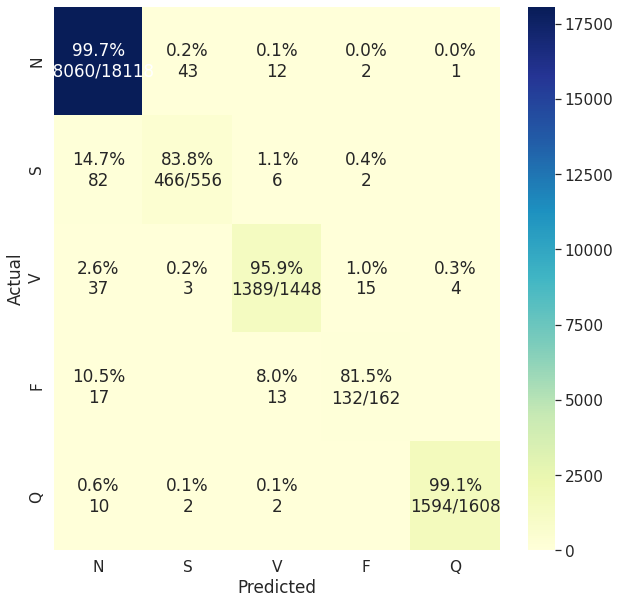

In [31]:
import seaborn as sns
#From https://www.kaggle.com/agungor2/various-confusion-matrix-plots
def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    col = ['N','S','V','F','Q']
    cm = pd.DataFrame(cm, index=col, columns=col)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(test_target, pred_idx_arr)